In [1574]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

from utils import train_test_val_split

In [1575]:
inlets = pd.read_csv("../datasets/all_inlets.csv", index_col="Time")
inlets = inlets.add_prefix("inlet_")

outlets = pd.read_csv("../datasets/all_outlets.csv", index_col="Time")
outlets = outlets.add_prefix("outlet_")

In [1576]:
inlet_temp_cols = list(inlets.columns)
outlet_temp_cols = list(outlets.columns)
del inlet_temp_cols[:2] # delete 'inlet_Case_id' and 'inlet_fan_speed'
del outlet_temp_cols[:2] # delete 'outlet_Case_id' and 'outlet_fan_speed'

In [1577]:
df = pd.concat([inlets, outlets], axis=1)

In [1578]:
df.to_csv("../datasets/df.csv", index=False)

In [1579]:
len(df)

1752

In [1580]:
df['inlet_Case_id'].value_counts()

5    783
4    371
3    211
2    204
1    183
Name: inlet_Case_id, dtype: int64

In [1581]:
df['inlet_Case_id'].value_counts() / len(df)

5    0.446918
4    0.211758
3    0.120434
2    0.116438
1    0.104452
Name: inlet_Case_id, dtype: float64

In [1582]:
case_1 = df[df['inlet_Case_id'] == 1]
case_2 = df[df['inlet_Case_id'] == 2]
case_3 = df[df['inlet_Case_id'] == 3]
case_4 = df[df['inlet_Case_id'] == 4]
case_5 = df[df['inlet_Case_id'] == 5]

In [1583]:
# Drop Case id columns
case_1 = case_1.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_2 = case_2.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_3 = case_3.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_4 = case_4.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_5 = case_5.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)

In [1584]:
# # Export to csv format
# case_1.to_csv('../datasets/case_1.csv')
# case_2.to_csv('../datasets/case_2.csv')
# case_3.to_csv('../datasets/case_3.csv')
# case_4.to_csv('../datasets/case_4.csv')
# case_5.to_csv('../datasets/case_5.csv')

# Visualization

## Case 1

### Preprocessing

In [1585]:
# case_1[inlet_temp_cols]

In [1586]:
case_1[outlet_temp_cols]  = savgol_filter(case_1[outlet_temp_cols], window_length=7, polyorder=3, mode="nearest", axis=0)
case_1[inlet_temp_cols]  = savgol_filter(case_1[inlet_temp_cols], window_length=7, polyorder=3, mode="nearest", axis=0)

In [1587]:
case_1[outlet_temp_cols]

,outlet_1,outlet_2,outlet_3,outlet_4,outlet_5,outlet_6,outlet_7,outlet_8,outlet_9,outlet_10,...,outlet_126,outlet_127,outlet_128,outlet_129,outlet_130,outlet_131,outlet_132,outlet_133,outlet_134,outlet_135
Time,,,,,,,,,,,,,,,,,,,,,
0,26.545238,25.053016,23.560794,22.068571,18.235714,16.679048,15.122381,16.196190,17.270000,25.298095,...,26.953333,30.723810,30.589683,30.455556,30.321429,30.130952,29.788095,29.445238,29.246190,29.047143
5,26.326190,25.044127,23.762063,22.480000,18.791905,17.048095,15.304286,16.163810,17.023333,24.847619,...,26.980476,30.750000,30.608889,30.467778,30.326667,30.120476,29.810000,29.499524,29.275000,29.050476
10,26.216667,25.186984,24.157302,23.127619,19.218571,17.379048,15.539524,16.198571,16.857619,24.795238,...,27.002381,30.759524,30.614444,30.469365,30.324286,30.111905,29.747619,29.383333,29.214286,29.045238
15,26.254762,25.310476,24.366190,23.421905,19.581429,17.663571,15.745714,16.251190,16.756667,24.775238,...,27.194286,30.725238,30.589365,30.453492,30.317619,30.121905,29.701905,29.281905,29.158571,29.035238
20,26.214762,25.181111,24.147460,23.113810,19.378095,17.687143,15.996190,16.390000,16.783810,24.970952,...,27.140952,30.687619,30.552698,30.417778,30.282857,30.059048,29.491429,28.923810,28.974524,29.025238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,26.981429,25.682857,24.384286,23.085714,18.967143,17.278095,15.589048,16.279762,16.970476,24.593333,...,26.855714,30.807619,30.643333,30.479048,30.314762,30.090952,29.592857,29.094762,29.207143,29.319524
895,27.015238,25.646984,24.278730,22.910476,18.914286,17.309286,15.704286,16.428571,17.152857,24.643333,...,26.952381,30.838571,30.667460,30.496349,30.325238,30.091429,29.667857,29.244286,29.286190,29.328095
900,27.154286,25.798571,24.442857,23.087143,19.095714,17.443095,15.790476,16.532143,17.273810,24.838095,...,27.333333,30.878095,30.712540,30.546984,30.381429,30.181905,29.847381,29.512857,29.425952,29.339048


In [1588]:
case_1[inlet_temp_cols]

,inlet_1,inlet_2,inlet_3,inlet_4,inlet_5,inlet_6,inlet_7,inlet_8,inlet_9,inlet_10,...,inlet_126,inlet_127,inlet_128,inlet_129,inlet_130,inlet_131,inlet_132,inlet_133,inlet_134,inlet_135
Time,,,,,,,,,,,,,,,,,,,,,
0,26.545238,25.053016,23.560794,22.068571,18.235714,16.679048,15.122381,16.196190,17.270000,25.298095,...,26.953333,30.723810,30.589683,30.455556,30.321429,30.130952,29.788095,29.445238,29.246190,29.047143
5,26.326190,25.044127,23.762063,22.480000,18.791905,17.048095,15.304286,16.163810,17.023333,24.847619,...,26.980476,30.750000,30.608889,30.467778,30.326667,30.120476,29.810000,29.499524,29.275000,29.050476
10,26.216667,25.186984,24.157302,23.127619,19.218571,17.379048,15.539524,16.198571,16.857619,24.795238,...,27.002381,30.759524,30.614444,30.469365,30.324286,30.111905,29.747619,29.383333,29.214286,29.045238
15,26.254762,25.310476,24.366190,23.421905,19.581429,17.663571,15.745714,16.251190,16.756667,24.775238,...,27.194286,30.725238,30.589365,30.453492,30.317619,30.121905,29.701905,29.281905,29.158571,29.035238
20,26.214762,25.181111,24.147460,23.113810,19.378095,17.687143,15.996190,16.390000,16.783810,24.970952,...,27.140952,30.687619,30.552698,30.417778,30.282857,30.059048,29.491429,28.923810,28.974524,29.025238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,26.981429,25.682857,24.384286,23.085714,18.967143,17.278095,15.589048,16.279762,16.970476,24.593333,...,26.855714,30.807619,30.643333,30.479048,30.314762,30.090952,29.592857,29.094762,29.207143,29.319524
895,27.015238,25.646984,24.278730,22.910476,18.914286,17.309286,15.704286,16.428571,17.152857,24.643333,...,26.952381,30.838571,30.667460,30.496349,30.325238,30.091429,29.667857,29.244286,29.286190,29.328095
900,27.154286,25.798571,24.442857,23.087143,19.095714,17.443095,15.790476,16.532143,17.273810,24.838095,...,27.333333,30.878095,30.712540,30.546984,30.381429,30.181905,29.847381,29.512857,29.425952,29.339048


In [1589]:
train_c1, test_c1, val_c1 = train_test_val_split(case_1, test_size=1)

### Fan Speed

#### Inlets

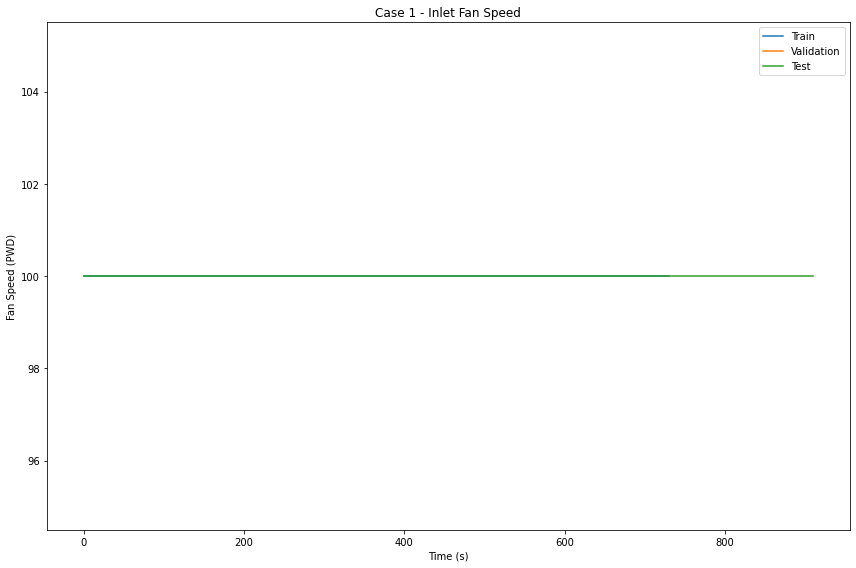

In [1590]:
fig, ax = plt.subplots(figsize=(12,8))
train_c1['inlet_fan_speed'].plot(label="Train")
val_c1['inlet_fan_speed'].plot(label="Validation")
test_c1['inlet_fan_speed'].plot(label="Test")

plt.title("Case 1 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()
plt.tight_layout()

plt.savefig("../plots/preprocessing/case1_inlet_fan_speed.jpg", dpi=300)

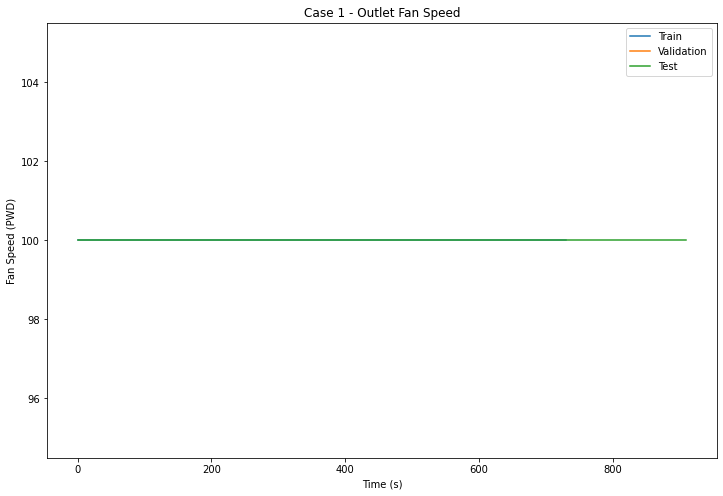

In [1591]:
fig, ax = plt.subplots(figsize=(12,8))
train_c1['outlet_fan_speed'].plot(label="Train")
val_c1['outlet_fan_speed'].plot(label="Validation")
test_c1['outlet_fan_speed'].plot(label="Test")

plt.title("Case 1 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case1_outlet_fan_speed.jpg", dpi=300)

### Temperature

#### Inlets

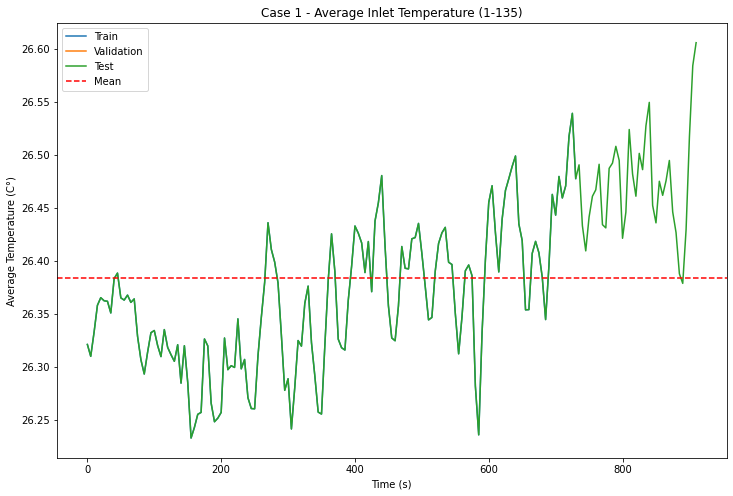

In [1592]:
fig, ax = plt.subplots(figsize=(12,8))

train_c1[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c1[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c1[inlet_temp_cols].mean(axis=1).plot(label="Test")

mean = case_1[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# plt.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Case 1 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

plt.legend()

plt.savefig("../plots/preprocessing/case1_inlet_temp.jpg", dpi=300)

#### Outlets

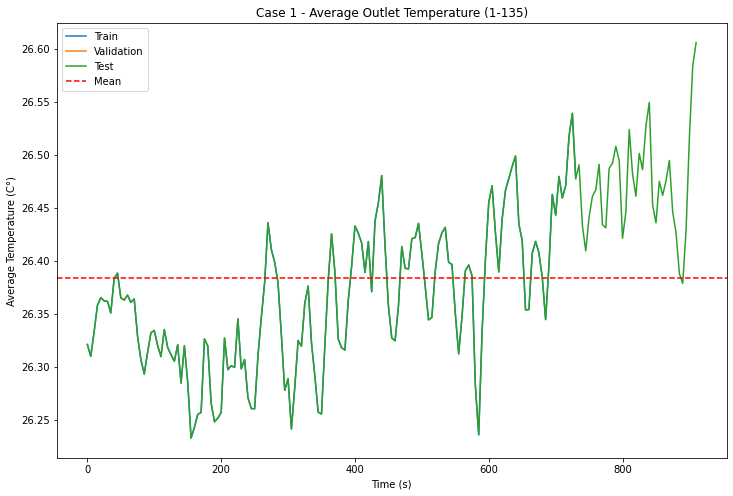

In [1593]:
fig, ax = plt.subplots(figsize=(12,8))

train_c1[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c1[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c1[outlet_temp_cols].mean(axis=1).plot(label="Test")

mean = case_1[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Case 1 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")
plt.legend()

plt.savefig("../plots/preprocessing/case1_outlet_temp.jpg", dpi=300)

In [1594]:
case_1.to_csv('../datasets/case_1.csv')

## Case 2

In [1595]:
train_c2, test_c2, val_c2 = train_test_val_split(case_2, test_size=0)

### Fan Speed

#### Inlets

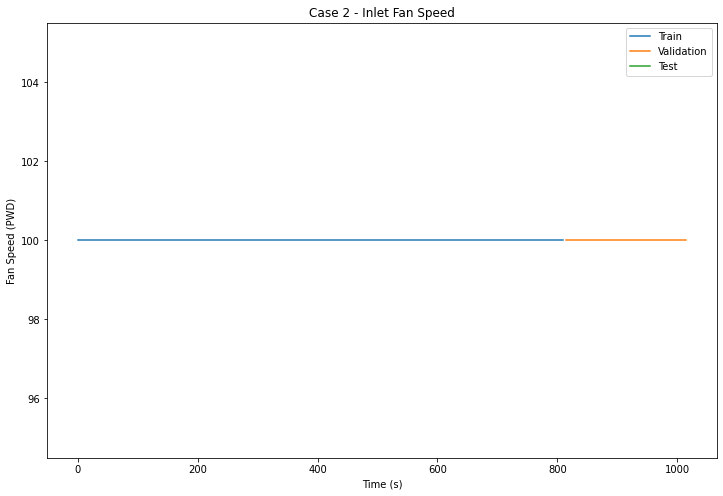

In [1596]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2["inlet_fan_speed"].plot(label="Train")
val_c2["inlet_fan_speed"].plot(label="Validation")
test_c2["inlet_fan_speed"].plot(label="Test")

plt.title("Case 2 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case2_inlet_fan_speed.jpg", dpi=300)

#### Outlets

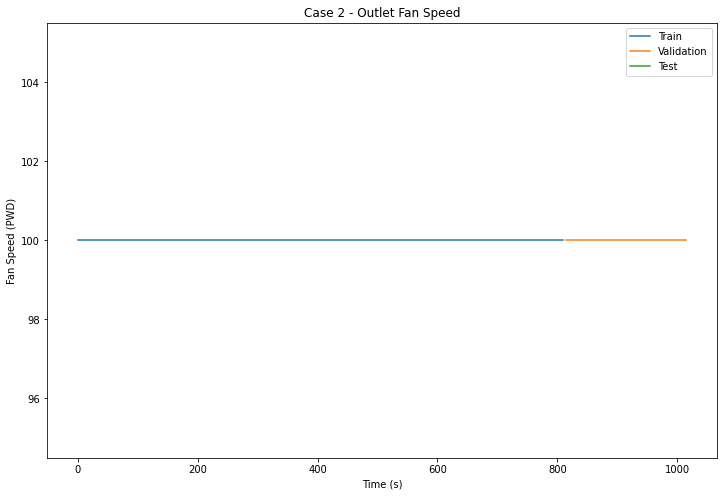

In [1597]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2["outlet_fan_speed"].plot(label="Train")
val_c2["outlet_fan_speed"].plot(label="Validation")
test_c2["outlet_fan_speed"].plot(label="Test")

plt.title("Case 2 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case2_outlet_fan_speed.jpg", dpi=300)

### Temperature

#### Inlets

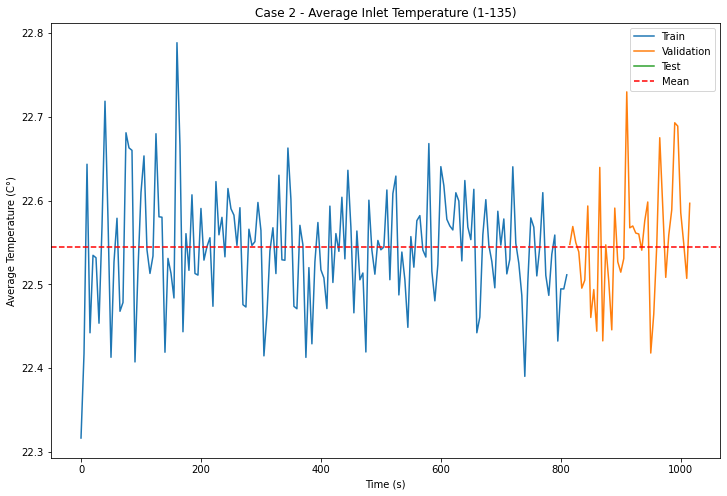

In [1598]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c2[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c2[inlet_temp_cols].mean(axis=1).plot(label="Test")

mean = case_2[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Case 2 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)") 
plt.legend()

plt.savefig("../plots/preprocessing/case2_inlet_temp.jpg", dpi=300)

#### Outlets

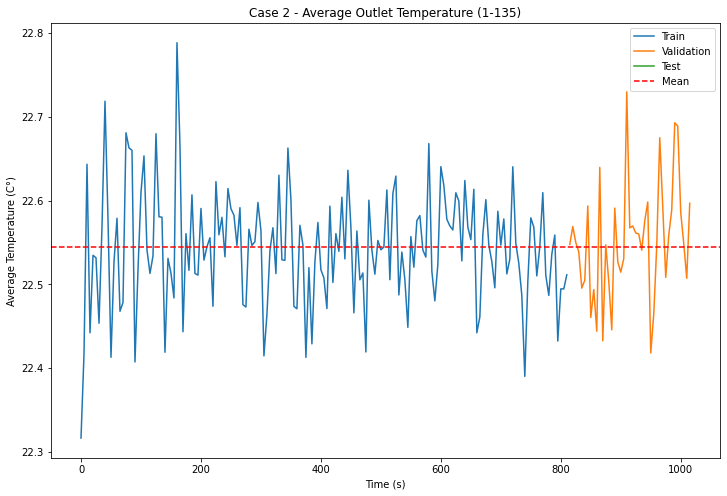

In [1599]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c2[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c2[outlet_temp_cols].mean(axis=1).plot(label="Test")

mean = case_2[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Case 2 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)") 

plt.legend()

plt.savefig("../plots/preprocessing/case2_outlet_temp.jpg", dpi=300)

In [1600]:
case_2.to_csv('../datasets/case_2.csv')

## Case 3

In [1601]:
train_c3, test_c3, val_c3 = train_test_val_split(case_3, test_size=0)

### Inlet Fan Speed

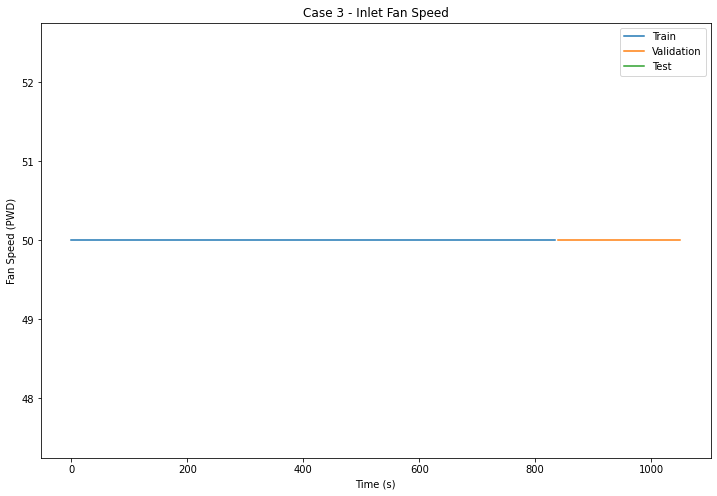

In [1602]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3["inlet_fan_speed"].plot(label="Train")
val_c3["inlet_fan_speed"].plot(label="Validation")
test_c3["inlet_fan_speed"].plot(label="Test")

plt.title("Case 3 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case3_inlet_fan_speed.jpg", dpi=300)

### Outlet Fan Speed

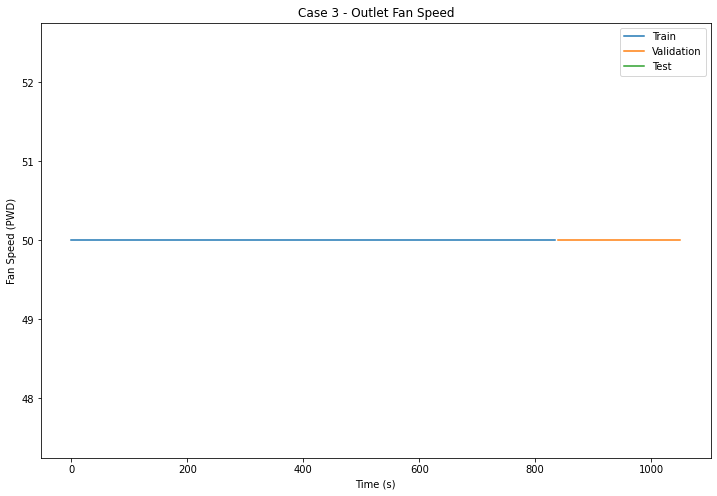

In [1603]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3["outlet_fan_speed"].plot(label="Train")
val_c3["outlet_fan_speed"].plot(label="Validation")
test_c3["outlet_fan_speed"].plot(label="Test")

plt.title("Case 3 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case3_outlet_fan_speed.jpg", dpi=300)

### Inlet Temperatures

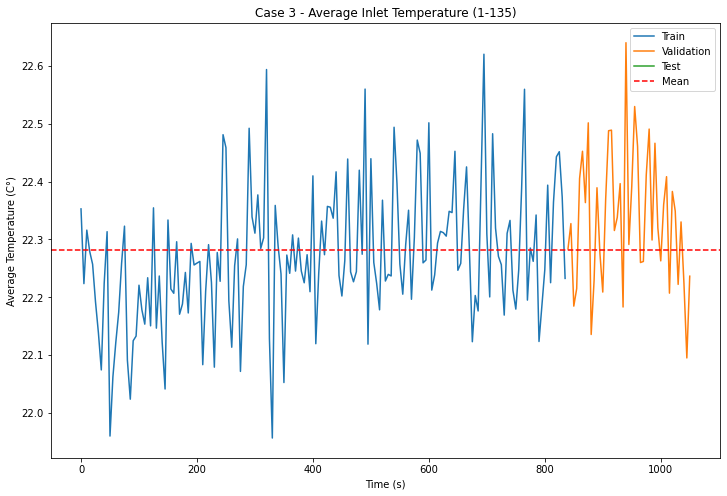

In [1604]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c3[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c3[inlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 3 - Average Inlet Temperature (1-135)")
plt.ylabel("Average Temperature (C°)")
plt.xlabel("Time (s)")

mean = case_3[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case3_inlet_temp.jpg", dpi=300)

### Outlet Temperatures

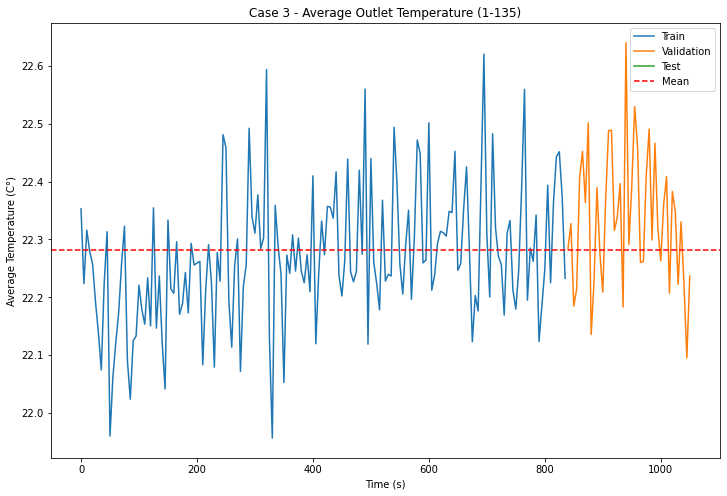

In [1605]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c3[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c3[outlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 3 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_3[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case3_outlet_temp.jpg", dpi=300)

In [1606]:
case_3.to_csv('../datasets/case_3.csv')

## Case 4

In [1607]:
train_c4, test_c4, val_c4 = train_test_val_split(case_4, test_size=0)

### Inlet Fan Speed

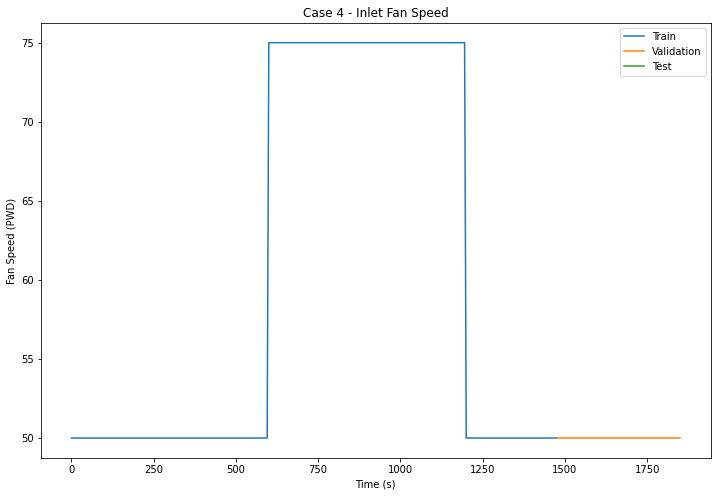

In [1608]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4["inlet_fan_speed"].plot(label="Train")
val_c4["inlet_fan_speed"].plot(label="Validation")
test_c4["inlet_fan_speed"].plot(label="Test")

plt.title("Case 4 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")

plt.legend()

plt.savefig("../plots/preprocessing/case4_inlet_fan_speed.jpg", dpi=300)

### Outlet Fan Speed

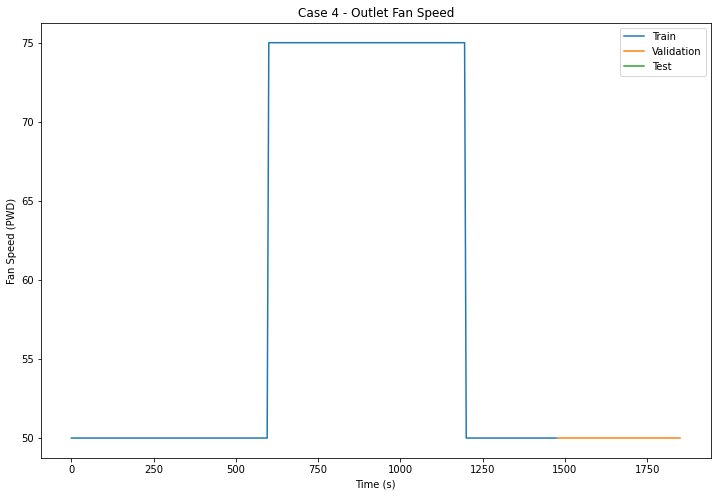

In [1609]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4["outlet_fan_speed"].plot(label="Train")
val_c4["outlet_fan_speed"].plot(label="Validation")
test_c4["outlet_fan_speed"].plot(label="Test")

plt.title("Case 4 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")

plt.legend()

plt.savefig("../plots/preprocessing/case4_outlet_fan_speed.jpg", dpi=300)

### Inlet Temperatures

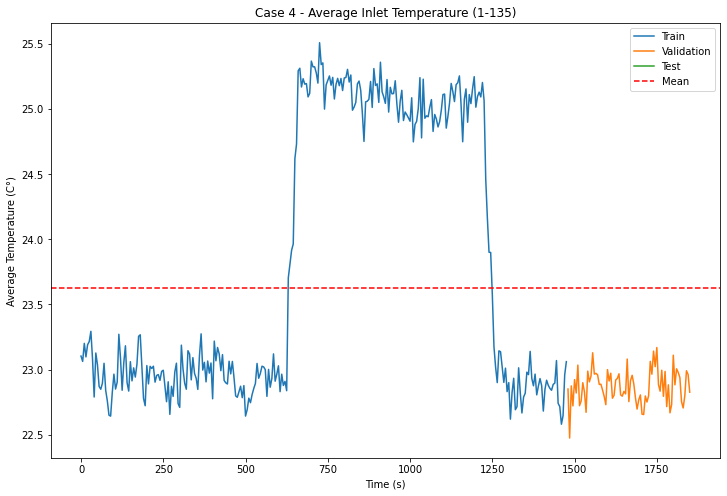

In [1610]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c4[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c4[inlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 4 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_4[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case4_inlet_temp.jpg", dpi=300)

### Outlet Temperatures

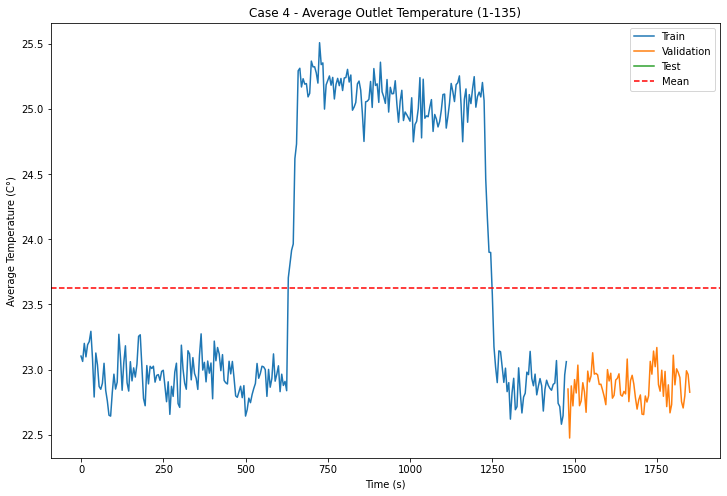

In [1611]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c4[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c4[outlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 4 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_4[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case4_outlet_temp.jpg", dpi=300)

In [1612]:
case_4.to_csv('../datasets/case_4.csv')

## Case 5

In [1613]:
train_c5, test_c5, val_c5 = train_test_val_split(case_5, test_size=0)

### Inlet Fan Speed

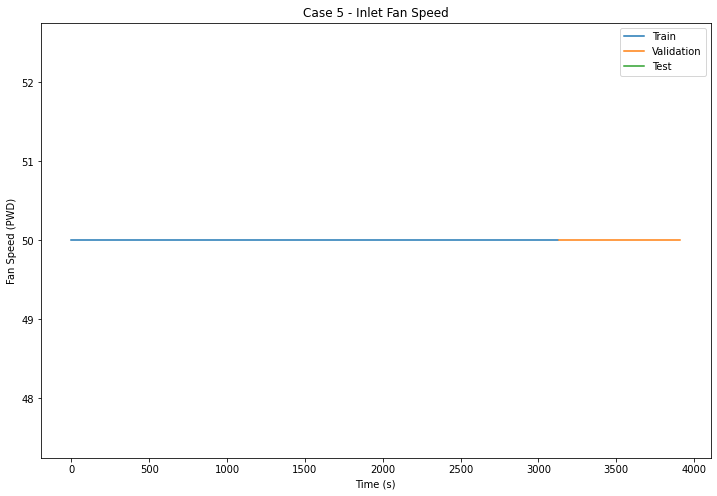

In [1614]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5["inlet_fan_speed"].plot(label="Train")
val_c5["inlet_fan_speed"].plot(label="Validation")
test_c5["inlet_fan_speed"].plot(label="Test")

plt.title("Case 5 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case5_inlet_fan_speed.jpg", dpi=300)

### Outlet Fan Speed

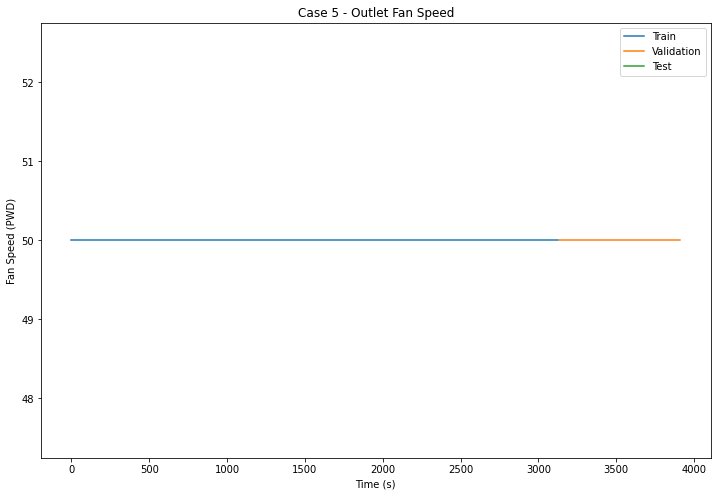

In [1615]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5["outlet_fan_speed"].plot(label="Train")
val_c5["outlet_fan_speed"].plot(label="Validation")
test_c5["outlet_fan_speed"].plot(label="Test")

plt.title("Case 5 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWD)")
plt.legend()

plt.savefig("../plots/preprocessing/case5_outlet_fan_speed.jpg", dpi=300)

### Inlet Temperature

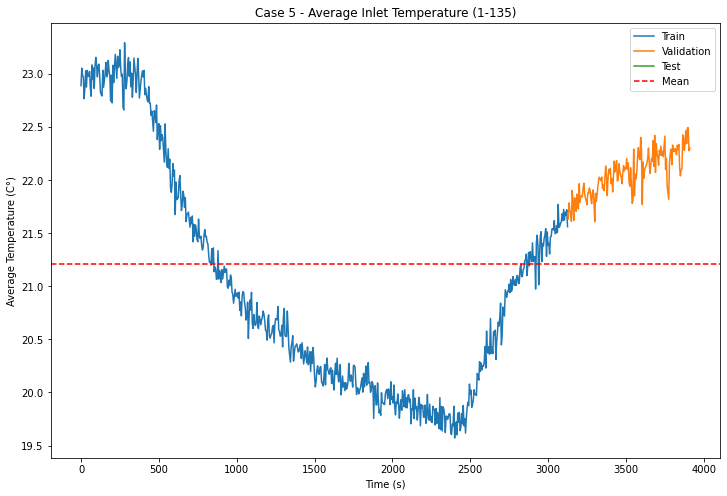

In [1616]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c5[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c5[inlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 5 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_5[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case5_inlet_temp.jpg", dpi=300)

### Outlet Temperature

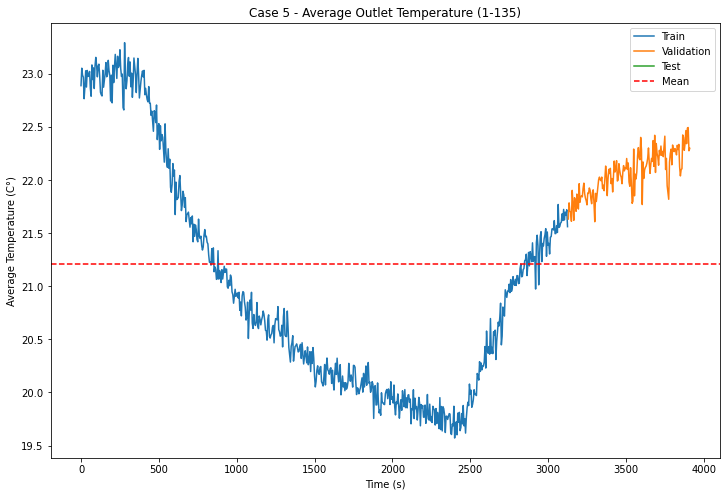

In [1617]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c5[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c5[outlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 5 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_5[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case5_outlet_temp.jpg", dpi=300)

In [1618]:
case_5.to_csv('../datasets/case_5.csv')